## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Generating Data

In [2]:
# Choose a mean,standard deviation, and number of samples

def create_ages(mu=50,sigma=13,num_samples=100,seed=42):

    # Set a random seed in the same cell as the random call to get the same values as us
    # We set seed to 42 (42 is an arbitrary choice from Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [3]:
sample = create_ages()

In [4]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

### Visualize and Describe the Data

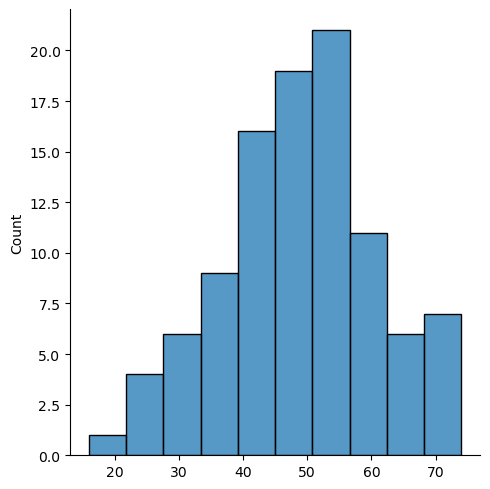

In [6]:
sns.displot(sample,bins=10,kde=False)

<Axes: >

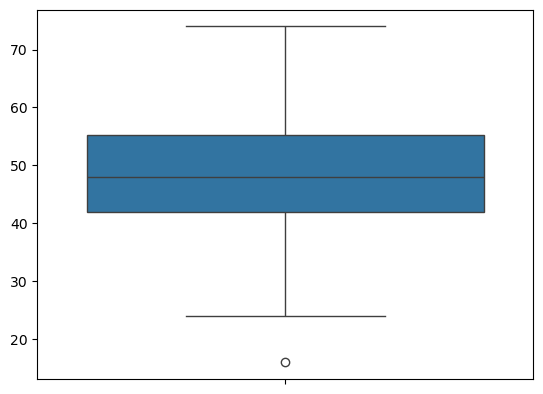

In [7]:
sns.boxplot(sample)

In [8]:
ser = pd.Series(sample)
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

### Trimming or Fixing Based Off Domain Knowledge
If we know we're dealing with a dataset pertaining to voting age (18 years old in the USA), then it makes sense to either drop anything less than that OR fix values lower than 18 and push them up to 18.

In [9]:
ser[ser > 18]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [10]:
# It dropped one person
len(ser[ser > 18])

99

In [11]:
def fix_values(age):
    
    if age < 18:
        return 18
    else:
        return age

In [12]:
# "Fixes" one person's age
ser.apply(fix_values)

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 100, dtype: float64

In [13]:
len(ser.apply(fix_values))

100

In [14]:
# Example DataFrame
data = {
    'feature1': [10, 20, 30, 40, 50],
    'feature2': [3, 5, 2, 8, 7],
    'feature3': [10, 8, 6, 4, 2],
    'target':    [100, 200, 300, 400, 500]
}
df = pd.DataFrame(data)

# 1. Correlation of all features with the target
correlations = df.drop(columns='target').corrwith(df['target'])
print("Correlation of each feature with target:\n", correlations)

# 2. Correlation of a single feature (e.g., 'feature1') with the target
corr_feature1_target = df['feature1'].corr(df['target'])
print("\nCorrelation of feature1 with target:", corr_feature1_target)


Correlation of each feature with target:
 feature1    1.000000
feature2    0.682191
feature3   -1.000000
dtype: float64

Correlation of feature1 with target: 1.0


### Ames Data Set
Let's explore any extreme outliers in our Ames Housing Data Set

In [18]:
df = pd.read_csv("./Archive/Machine Learning/Dataset/Ames_Housing_Data.csv")

In [19]:
df.shape

(2930, 81)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [23]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [62]:
# df.corr()

In [26]:
df.corr(numeric_only=True)

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.098375,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914


<Axes: >

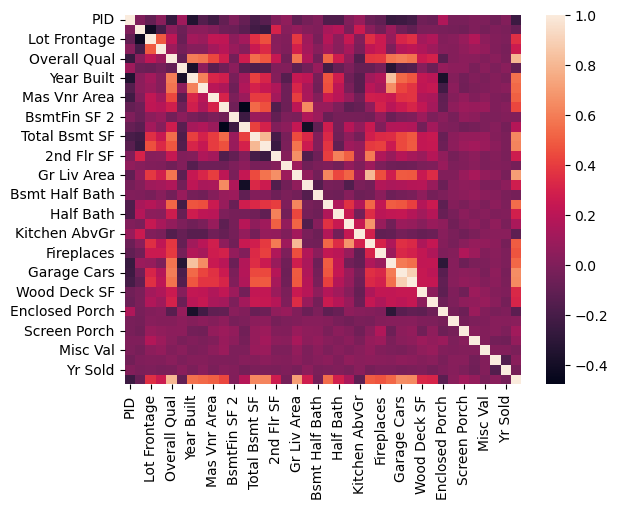

In [32]:
sns.heatmap(df.corr(numeric_only=True))

In [34]:
df.corr(numeric_only=True)['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<Axes: xlabel='SalePrice', ylabel='Count'>

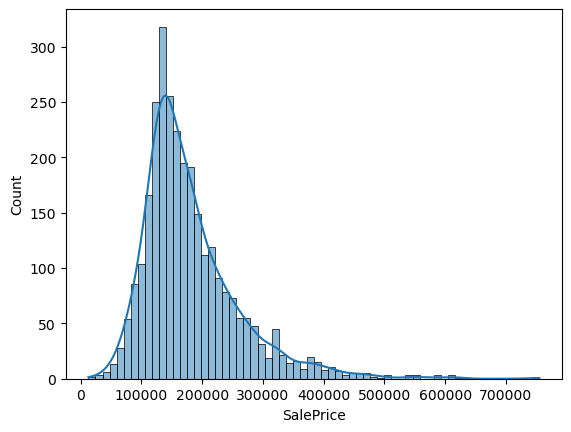

In [35]:
sns.histplot(df["SalePrice"],kde=True)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

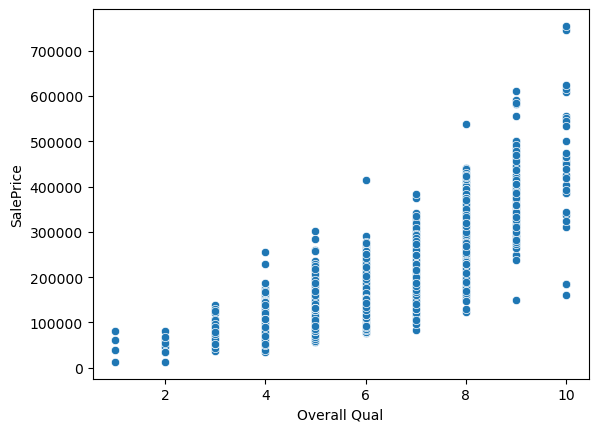

In [36]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [37]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [38]:
df.shape

(2930, 81)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

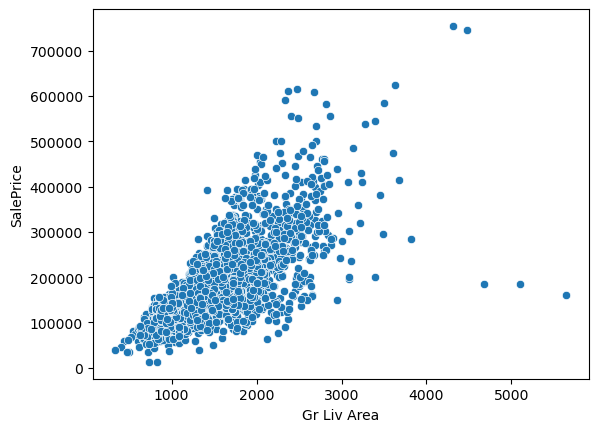

In [39]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

In [40]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [41]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

Index([1498, 2180, 2181], dtype='int64')

In [42]:
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [43]:
df = df.drop(ind_drop,axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

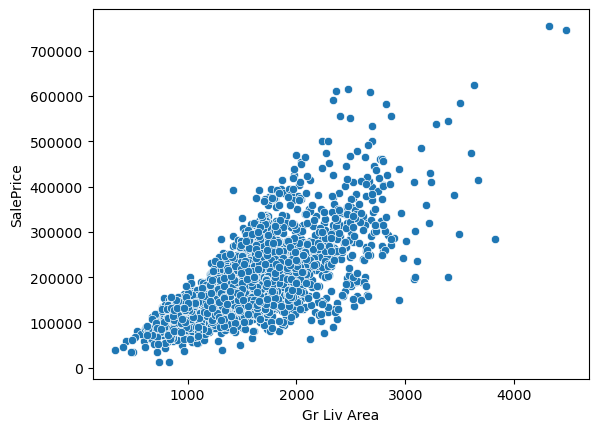

In [44]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

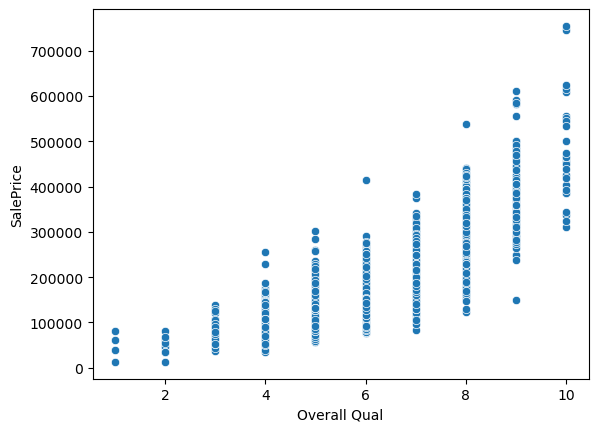

In [45]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [46]:
df.to_csv("./Archive/Machine Learning/Dataset/Ames_outliers_removed.csv",index=False)

In [54]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']>700000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1760,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1767,528351010,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [55]:
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']>700000)].index

In [56]:
ind_drop

Index([1760, 1767], dtype='int64')

In [57]:
df = df.drop(ind_drop, axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

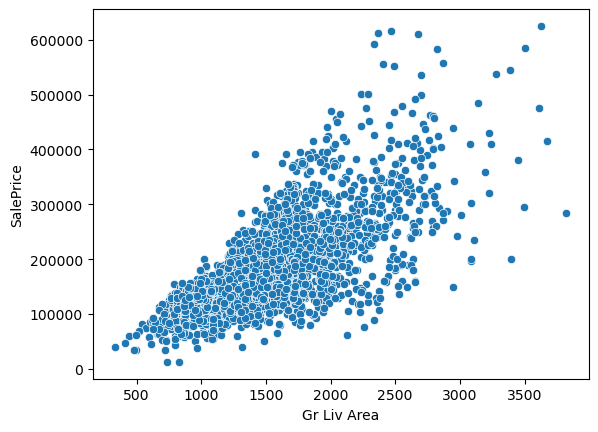

In [58]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

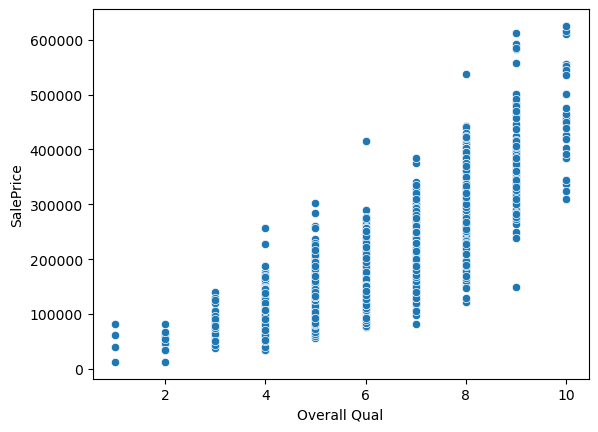

In [59]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [60]:
df.to_csv("./Archive/Machine Learning/Dataset/Ames_outliers_removed.csv",index=False)

# Dealing with Categorical Data
Many machine learning models can not deal with categorical data set as strings. For example linear regression can not apply a a Beta Coefficent to colors like "red" or "blue". Instead we need to convert these categories into "dummy" variables, otherwise known as "one-hot" encoding.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsZ

## Data
We will open the .csv file that has been "cleaned" to remove outliers and NaN from the previous lectures.

In [5]:
df = pd.read_csv("./Archive/Machine Learning/Dataset/Ames_NO_Missing_Data.csv")

In [ ]:
zZzzzZzZzzzzzZZZZzzzzzzZzzzZZZzZzZZZzzzzZZZZzzzZzzZzZZzZzzzZzzzzzz